# Entropy analysis


This notebook analyzes the linguistic diversity and complexity of Arabic song lyrics by computing the entropy of distributions across different time scales. Using a dataset of song lyrics, it calculates entropy at the corpus level, for individual songs, and grouped by named decades. These entropy measurements quantify the unpredictability and variation in letter usage, offering insights into how lyrical diversity has evolved over time. The notebook also includes visualizations to help explore trends and patterns, making it a useful tool for researchers interested in computational linguistics, musicology, and cultural analysis of Arabic music.


In [1]:
import os
import pandas as pd
import re
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
def construct_df():
    arabic_letters = [
        # Hamza variations
        '\u0621', '\u0622', '\u0623', '\u0625', '\u0627',
        '\u0671', '\u0672', '\u0673', '\u0674', '\u0675',

        # Ba variations
        '\u0628', '\u066E', '\u067B', '\u067E', '\u0680',

        # Ta variations
        '\u062A', '\u067A', '\u062B',

        # Other letters
        '\u062C', '\u062D', '\u062E', '\u062F', '\u0630',
        '\u0631', '\u0632', '\u0633', '\u0634', '\u0635',
        '\u0636', '\u0637', '\u0638', '\u0639', '\u063A',
        '\u0641', '\u0642', '\u0643', '\u0644', '\u0645',
        '\u0646', '\u0647', '\u06C1', '\u06C3',

        # Waw and Ya variations
        '\u0648', '\u0624', '\u0620', '\u0649', '\u064A',
        '\u06CC',

        # Space
        '\u0020'
    ]

    df = pd.DataFrame({
        "letter": arabic_letters,
        "frequency": [0] * len(arabic_letters)
    })

    return df



The construct_df() defines a list of Arabic letters, including various forms of certain characters like Hamza, Ba, Ta, and Waw, along with some other commonly used letters and the space character. Each Arabic letter is represented by its corresponding Unicode escape sequence. This list, arabic_letters, is then used to create a pandas DataFrame. The DataFrame has two columns: "letter" and "frequency". The "letter" column contains the Arabic characters, and the "frequency" column is initialized with zeros, indicating that the frequency count for each letter is initially zero. The function finally returns the constructed DataFrame, which can be used for further analysis or manipulation, such as counting the frequency of each Arabic letter in a given text.

In [3]:
def tokenize_characters(text, strip_non_alphanum=False):
    if strip_non_alphanum:
        text = re.sub(r'[^\w\s]', '', text)
    return list(text)

def arabic_characters_frequency(corpus_of_text):
    # Construct the dataframe with Arabic letters and initialized frequencies
    arabic_letters_frequency = construct_df()

    # Iterate through each text in the corpus
    for text in corpus_of_text['corpus']:
        # Tokenize the text into characters
        characters = tokenize_characters(text)

        # Count frequencies
        for char in characters:
            # Find the index of the character in the dataframe
            mask = arabic_letters_frequency['letter'] == char

            # Increment frequency if the character is found
            if mask.any():
                arabic_letters_frequency.loc[mask, 'frequency'] += 1

    return arabic_letters_frequency

The arabic_characters_frequency function takes a corpus of Arabic texts, tokenizes them into individual characters, and updates a DataFrame with the frequencies of each Arabic letter. This DataFrame is initially constructed by the construct_df() function, which sets up a predefined list of Arabic letters. The function is useful for analyzing the frequency of Arabic characters in a given set of songs.

In [4]:
# Sample corpus (equivalent to the R dataframe)
corpus_of_text = pd.DataFrame({
    'corpus': ['على احمد محمد', 'محمد عبد العزيز خميس', 'وليد السيد على']
})

# Function to compute the frequency of Arabic letters in the corpus
freqs = arabic_characters_frequency(corpus_of_text)

# Display the frequency dataframe
print(freqs)

# Calculate and print the total number of letters in the corpus
total_letters = freqs['frequency'].sum()
print(f"The corpus contains a total of: {total_letters} letters.")

   letter  frequency
0       ء          0
1       آ          0
2       أ          0
3       إ          0
4       ا          3
5       ٱ          0
6       ٲ          0
7       ٳ          0
8       ٴ          0
9       ٵ          0
10      ب          1
11      ٮ          0
12      ٻ          0
13      پ          0
14      ڀ          0
15      ت          0
16      ٺ          0
17      ث          0
18      ج          0
19      ح          3
20      خ          1
21      د          6
22      ذ          0
23      ر          0
24      ز          2
25      س          2
26      ش          0
27      ص          0
28      ض          0
29      ط          0
30      ظ          0
31      ع          4
32      غ          0
33      ف          0
34      ق          0
35      ك          0
36      ل          5
37      م          6
38      ن          0
39      ه          0
40      ہ          0
41      ۃ          0
42      و          1
43      ؤ          0
44      ؠ          0
45      ى          2
46      ي    

Summary of Execution:

This code computes the frequency of Arabic letters in the given corpus of a set of three Arabic sentences. It outputs:

- A DataFrame showing each Arabic letter and its frequency in the corpus.

- The total number of letters in the corpus, based on the sum of the frequencies.

The arabic_characters_frequency function is key here, as it processes the text, tokenizes it into individual characters, and counts the occurrences of each Arabic letter.


In [5]:
def normalize_arabic_letters(freqs):
    normalization_map = {
        # Alif variations
        'alif_group': ['\u0621', '\u0622', '\u0623', '\u0625', '\u0627',
                       '\u0671', '\u0672', '\u0673', '\u0674', '\u0675'],

        # Ba variations
        'ba_group': ['\u0628', '\u066E', '\u067B', '\u067E', '\u0680'],

        # Ta variations
        'ta_group': ['\u062A', '\u067A', '\u062B'],

        # Haa variations
        'haa_group': ['\u0647', '\u06C1', '\u06C3'],

        # Waw variations
        'waw_group': ['\u0648', '\u0624', '\u0620'],

        # Ya variations
        'ya_group': ['\u0649', '\u064A', '\u06CC']
    }

    # Create a list to store normalized frequencies
    normalized_data = []

    # Normalize frequencies
    for group_name, letter_group in normalization_map.items():
        group_freq = freqs[freqs['letter'].isin(letter_group)]['frequency'].sum()
        normalized_data.append({
            'letter_group': group_name,
            'frequency': group_freq
        })

    # Add space separately
    space_freq = freqs[freqs['letter'] == '\u0020']['frequency'].sum()
    normalized_data.append({
        'letter_group': 'space',
        'frequency': space_freq
    })

    # Convert to DataFrame
    normalized_freqs = pd.DataFrame(normalized_data)

    return normalized_freqs



The normalize_arabic_letters function groups similar Arabic letters (such as different variations of "Alif" or "Ba") into larger categories and calculates the total frequency for each group. This normalization process simplifies the analysis by reducing the complexity of individual letter variations. It also includes the frequency of spaces separately. The function returns a DataFrame with the total frequencies for each letter group and space, making it easier to analyze the overall distribution of characters in the corpus.

In [6]:
def extract_prob_dist(frequency):
    # Compute total sample size
    total = frequency['frequency'].sum()

    # Normalize to get probability distribution
    prob_dist = frequency['frequency'] / total

    return prob_dist

def entropy(prob_dist):
    # Remove zero probabilities
    non_zero_probs = prob_dist[prob_dist > 0]

    # Compute entropy
    return -np.sum(non_zero_probs * np.log2(non_zero_probs))


1. **`extract_prob_dist` function:**

   * This function takes a list of frequencies (how often each letter appears) and converts it into probabilities.
   * It first calculates the total by summing up the frequencies.
   * Then, it divides each frequency by this total to get the probability of each letter.

2. **`entropy` function:**

   * Entropy is a measure of how "spread out" or "uncertain" the probabilities are.
   * This function takes the probabilities and calculates the entropy by using a formula.
   * It ignores probabilities that are zero because they don’t add any uncertainty.
   * Finally, it calculates the entropy by multiplying each probability by its log value (log base 2) and summing it up, but with a negative sign to get the final result.

For Summing up:

* The `extract_prob_dist` function turns letter frequencies into probabilities.
* The `entropy` function measures how uncertain or unpredictable these probabilities are.


In [ ]:
def main():
    # Load songs data
    DATA_PATH = r"../data/amr_diab_songs.csv"

    try:
        # Load csv file
        songs = pd.read_csv(DATA_PATH)

        # Extract lyrics
        lyrics = pd.DataFrame({
            'corpus': songs['Lyrics'].dropna()
        })

        print(f"Total number of songs: {len(lyrics)}")

        # Calculate letter frequencies
        start_time = time.time()
        freqs = arabic_characters_frequency(lyrics)

        # Normalize frequencies
        normalized_freqs = normalize_arabic_letters(freqs)

        # Calculate probability distribution
        prob_dist = extract_prob_dist(normalized_freqs)

        # Calculate entropy
        entropy_value = entropy(prob_dist)

        end_time = time.time()

        print(f"Entropy of the lyrics: {entropy_value}")
        print(f"Processing time: {end_time - start_time:.2f} seconds")

        # Save frequencies to CSV
        freqs.to_csv(r"./results/frequencies.csv", index=False)
        normalized_freqs.to_csv(r"./results/normalized_frequencies.csv", index=False)

    except Exception as e:
        print(f"An error occurred: {e}")
        # Print traceback for more detailed error information
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Total number of songs: 310
Entropy of the lyrics: 2.5123773010471995
Processing time: 202.31 seconds


The `main()` function processes a dataset of song lyrics stored in an Excel file by performing the following steps:

1. **Loads the data**: It reads the song lyrics from the songs.xlsx file and stores them in a DataFrame.
2. **Extracts lyrics**: It isolates the lyrics of each song, dropping any missing values.
3. **Calculates letter frequencies**: It counts how often each Arabic letter appears in the lyrics using the `arabic_characters_frequency` function.
4. **Normalizes frequencies**: It groups similar letters (different variations of "Alif") and sums their frequencies for more simplified analysis.
5. **Computes probability distribution**: It normalizes the frequencies into probabilities.
6. **Calculates entropy**: It measures the uncertainty or randomness in the lyrics based on the probability distribution using the `entropy` function.

Commenting on the outputs:

The entropy value measures the unpredictability or disorder in the lyrics. In this case, the entropy value of approximately 2.51 suggests a moderate level of uncertainty or variety in the distribution of Arabic letters across the lyrics. A higher entropy value would indicate more randomness or unpredictability in the text, while a lower value would suggest more repetitive or structured content.

In [13]:
def compute_corpus_entropy(lyrics_df):
    """Compute the entropy of the whole corpus"""
    # Create a dataframe with only the lyrics column
    lyrics_corpus = pd.DataFrame({
        'corpus': lyrics_df['Lyrics'].dropna()
    })

    # Calculate letter frequencies
    freqs = arabic_characters_frequency(lyrics_corpus)

    # Normalize frequencies
    letter_normalized_freqs = normalize_arabic_letters(freqs)

    # Calculate probability distribution
    prob_dist = extract_prob_dist(letter_normalized_freqs)

    # Calculate entropy
    corpus_entropy = entropy(prob_dist)

    print(f"The entropy of the whole corpus is: {corpus_entropy}")

    return corpus_entropy

The `compute_corpus_entropy` function calculates the entropy of a given corpus of song lyrics. It first extracts the lyrics from the provided DataFrame, then computes the frequency of Arabic letters in the lyrics. These frequencies are normalized by grouping similar letter variations together. Next, the function calculates the probability distribution of the normalized frequencies. Finally, it computes the entropy, which measures the level of unpredictability or disorder in the distribution of letters. The entropy value is printed and returned, providing insight into the randomness or structure of the letter usage across the entire corpus of lyrics.


In [14]:
def compute_song_entropy(lyrics_df):
    """Compute entropy for every song in the corpus"""
    N = len(lyrics_df)  # get the total number of songs
    song_entropy = []

    for i in range(N):
        # Get lyrics of current song
        ly = pd.DataFrame({
            'corpus': [lyrics_df.iloc[i]['Lyrics']]
        })

        # Skip if lyrics is NaN
        if pd.isna(ly['corpus'][0]):
            song_entropy.append(np.nan)
            continue

        # Compute the histogram/frequency of all Arabic letters with all variations
        freqs = arabic_characters_frequency(ly)

        # Normalize Arabic letters
        letter_normalized_freqs = normalize_arabic_letters(freqs)

        # Convert the histogram into proper empirical probability mass function
        prob_dist = extract_prob_dist(letter_normalized_freqs)

        # Calculate entropy
        song_entropy.append(entropy(prob_dist))

    # Add entropy values to lyrics dataframe
    lyrics_df['entropy'] = song_entropy

    # Find min and max entropy songs
    valid_entropy = lyrics_df.dropna(subset=['entropy'])

    min_entropy_song = valid_entropy.loc[valid_entropy['entropy'].idxmin()]
    max_entropy_song = valid_entropy.loc[valid_entropy['entropy'].idxmax()]

    print(f"The song with minimum entropy: {min_entropy_song['Song']}")
    print(f"It has a minimum entropy of: {min_entropy_song['entropy']}")
    print(f"The song with maximum entropy: {max_entropy_song['Song']}")
    print(f"It has a maximum entropy of: {max_entropy_song['entropy']}")

    return lyrics_df

The `compute_song_entropy` function calculates the entropy of each song's lyrics in a given DataFrame of song lyrics. It computes the letter frequencies, normalizes them, converts the frequencies into a probability distribution, and then calculates the entropy for each song. It also identifies and prints the songs with the lowest and highest entropy, providing insight into which songs have the most predictable (low entropy) and least predictable (high entropy) letter distributions. The function returns the updated DataFrame with entropy values for each song.


In [16]:
def plot_entropy_histogram(lyrics_df):
    """Plot histogram of entropy values across songs"""
    plt.figure(figsize=(10, 6))

    # Drop NaN entropy values
    valid_entropy = lyrics_df.dropna(subset=['entropy'])

    # Create histogram
    plt.hist(valid_entropy['entropy'], bins=20, color='lightblue', edgecolor='black')

    # Add title and labels
    plt.title('Histogram of entropy values of individual songs')
    plt.xlabel('Entropy')
    plt.ylabel('Frequency')

    # Customize x-axis
    min_entropy = round(valid_entropy['entropy'].min(), 1)
    max_entropy = round(valid_entropy['entropy'].max(), 1)
    plt.xticks(np.arange(min_entropy, max_entropy + 0.1, 0.1))
    plt.xticks(rotation=45)

    # Save and show plot
    plt.tight_layout()
    plt.savefig(r"./results/entropy_histogram.png")
    plt.show()

The `plot_entropy_histogram` function generates a histogram to visualize the distribution of entropy values across individual songs in the given DataFrame. It ensures that only valid entropy values (non-NaN) are used.  This helps to analyze the spread of entropy values and observe patterns in the unpredictability of the lyrics across songs.

In [17]:
def compute_entropy_per_year(songs_df):
    """Compute entropy for each year"""
    # Group by year
    years = songs_df['Year'].dropna().unique()
    yearly_entropy = []

    for year in years:
        # Get songs from this year
        year_songs = songs_df[songs_df['Year'] == year]

        # Create lyrics corpus for this year
        year_lyrics = pd.DataFrame({
            'corpus': year_songs['Lyrics'].dropna()
        })

        # Skip if no lyrics available for this year
        if len(year_lyrics) == 0:
            continue

        # Compute frequencies
        freqs = arabic_characters_frequency(year_lyrics)

        # Normalize frequencies
        letter_normalized_freqs = normalize_arabic_letters(freqs)

        # Calculate probability distribution
        prob_dist = extract_prob_dist(letter_normalized_freqs)

        # Calculate entropy
        yearly_entropy.append({
            'Year': year,
            'entropy': entropy(prob_dist)
        })

    # Convert to DataFrame
    yearly_entropy_df = pd.DataFrame(yearly_entropy)

    return yearly_entropy_df

The `compute_entropy_per_year` function calculates the entropy for each year of song lyrics in the given dataset. It first filters the data by year, computes the letter frequencies, normalizes them, and calculates the entropy for each year. The result is returned as a DataFrame with two columns: `'Year'` and `'entropy'`. This allows for analysis of the entropy of song lyrics over time, showing how the unpredictability or diversity of letter usage varies by year.


In [18]:
def plot_yearly_entropy(yearly_entropy_df):
    """Plot entropy over years with trend lines"""
    plt.figure(figsize=(12, 6))

    # Scatter plot
    plt.scatter(yearly_entropy_df['Year'], yearly_entropy_df['entropy'],
                alpha=0.4, color='darkblue', s=30)

    # Linear regression
    x = yearly_entropy_df['Year']
    y = yearly_entropy_df['entropy']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line_x = np.array([min(x), max(x)])
    line_y = slope * line_x + intercept
    plt.plot(line_x, line_y, color='black', label=f'Linear (r={r_value:.2f})')

    # LOESS/LOWESS smoothing using seaborn
    sns.regplot(x='Year', y='entropy', data=yearly_entropy_df,
                scatter=False, lowess=True, color='red', line_kws={'lw': 2})

    # Add title and labels
    plt.title('Yearly Entropy')
    plt.xlabel('Year')
    plt.ylabel('Entropy')

    # Customize axes
    plt.xticks(np.arange(min(yearly_entropy_df['Year']), max(yearly_entropy_df['Year']) + 1, 1),
               rotation=45)
    plt.yticks(np.arange(round(min(yearly_entropy_df['entropy']), 2),
                         round(max(yearly_entropy_df['entropy']), 2) + 0.01, 0.01))

    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()

    # Save and show plot
    plt.savefig(r"./results/yearly_entropy.png")
    plt.show()



In [19]:
def compute_entropy_per_decade(songs_df):
    """Compute entropy for each decade"""
    # Create decade column
    songs_df['Decade'] = (songs_df['Year'] // 10) * 10

    # Group by decade
    decades = songs_df['Decade'].dropna().unique()
    decade_entropy = []

    for decade in decades:
        # Get songs from this decade
        decade_songs = songs_df[songs_df['Decade'] == decade]

        # Create lyrics corpus for this decade
        decade_lyrics = pd.DataFrame({
            'corpus': decade_songs['Lyrics'].dropna()
        })

        # Skip if no lyrics available for this decade
        if len(decade_lyrics) == 0:
            continue

        # Compute frequencies
        freqs = arabic_characters_frequency(decade_lyrics)

        # Normalize frequencies
        letter_normalized_freqs = normalize_arabic_letters(freqs)

        # Calculate probability distribution
        prob_dist = extract_prob_dist(letter_normalized_freqs)

        # Calculate entropy
        decade_entropy.append({
            'Decade': decade,
            'entropy': entropy(prob_dist)
        })

    # Convert to DataFrame
    decade_entropy_df = pd.DataFrame(decade_entropy)

    return decade_entropy_df



The `compute_entropy_per_decade` function calculates the entropy of song lyrics for each decade in the given dataset. It first groups the songs by decade, computes the letter frequencies, normalizes them, and calculates the entropy for each decade. The result is returned as a DataFrame with two columns: `'Decade'` and `'entropy'`. This allows for analysis of how the unpredictability or variety in letter usage has changed over different decades.


In [20]:
def plot_decade_entropy(decade_entropy_df):
    """Plot entropy by decade as a bar chart"""
    plt.figure(figsize=(10, 6))

    # Bar chart
    plt.bar(decade_entropy_df['Decade'].astype(str), decade_entropy_df['entropy'],
            color='lightblue', edgecolor='black')

    # Add title and labels
    plt.title('Entropy by Decade')
    plt.xlabel('Decade')
    plt.ylabel('Entropy')

    # Add value labels on top of bars
    for i, v in enumerate(decade_entropy_df['entropy']):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(r"./results/decade_entropy.png")
    plt.show()



Loading songs data...
Total number of songs with lyrics: 310

--- Computing corpus entropy ---
The entropy of the whole corpus is: 2.5123773010471995

--- Computing song entropy ---
The song with minimum entropy: لا لا
It has a minimum entropy of: 1.6237045228232625
The song with maximum entropy: بلاش تكلمها
It has a maximum entropy of: 2.682116663807732

--- Plotting entropy histogram ---


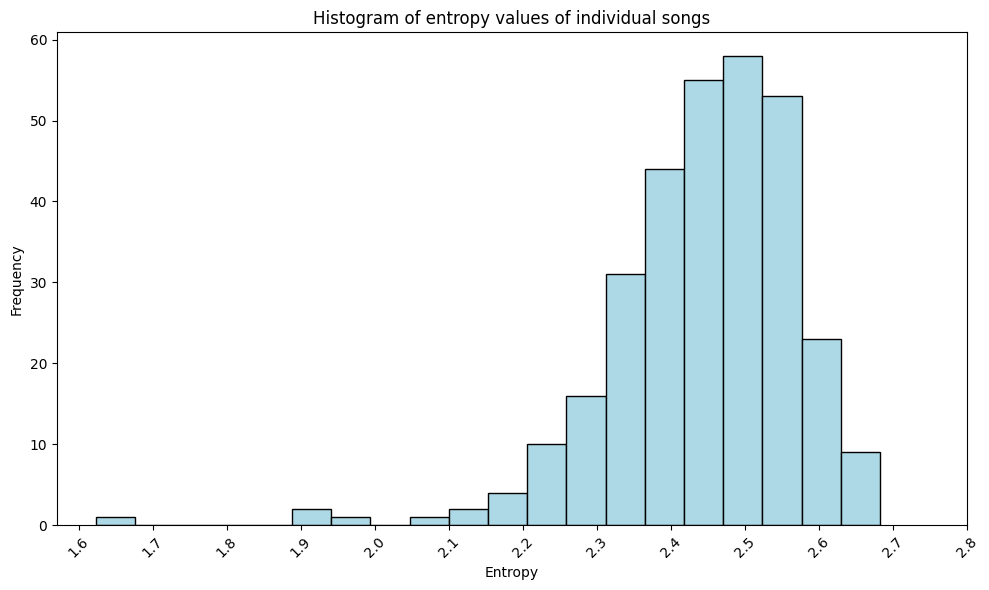


--- Computing yearly entropy ---

--- Plotting yearly entropy ---


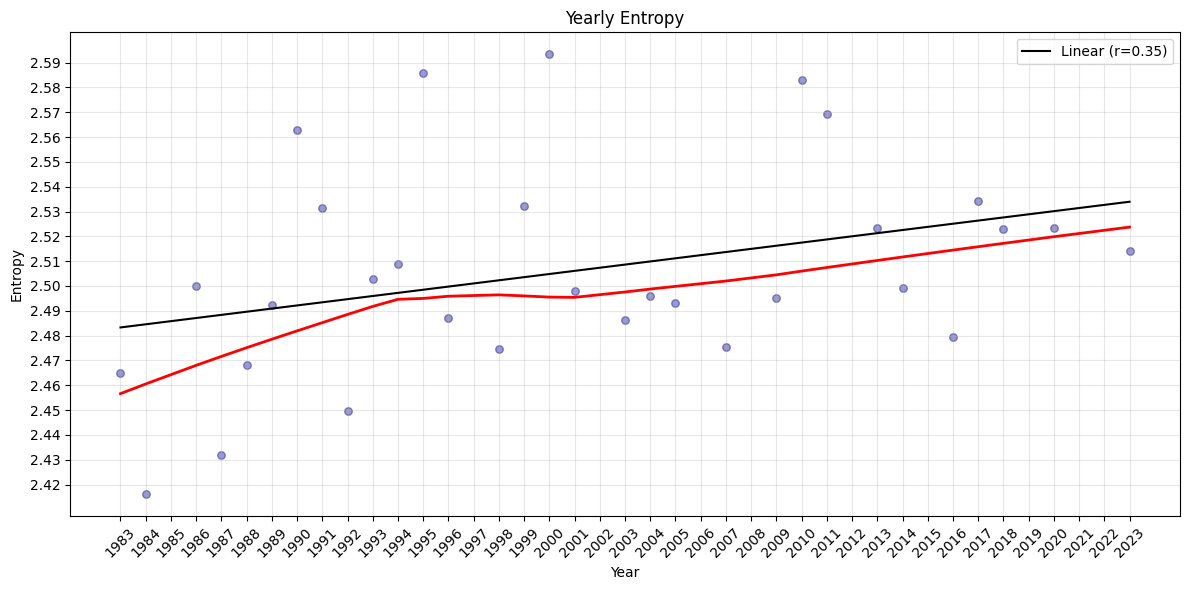


--- Computing decade entropy ---

--- Plotting decade entropy ---


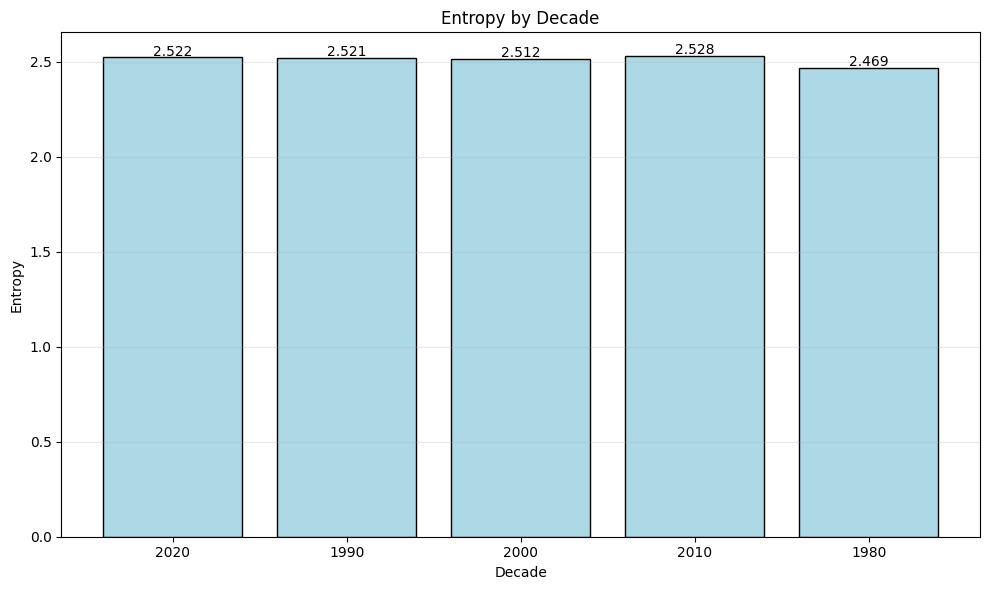


--- Saving results ---

Analysis complete. Results and plots saved.


In [21]:
def main():
    # Load songs data
    DATA_PATH = r"../data/amr_diab_songs.csv"

    try:
        # Load csv file
        print("Loading songs data...")
        songs = pd.read_csv(DATA_PATH)

        # Extract lyrics for whole corpus entropy
        lyrics = pd.DataFrame({
            'Song': songs['Song'],
            'Year': songs['Year'],
            'Lyrics': songs['Lyrics'].dropna()
        })

        print(f"Total number of songs with lyrics: {len(lyrics)}")

        # 1. Compute corpus entropy
        print("\n--- Computing corpus entropy ---")
        corpus_entropy = compute_corpus_entropy(lyrics)

        # 2. Compute song entropy
        print("\n--- Computing song entropy ---")
        lyrics_with_entropy = compute_song_entropy(lyrics)

        # 3. Plot entropy histogram
        print("\n--- Plotting entropy histogram ---")
        plot_entropy_histogram(lyrics_with_entropy)

        # 4. Compute and plot yearly entropy
        print("\n--- Computing yearly entropy ---")
        yearly_entropy = compute_entropy_per_year(songs)
        print("\n--- Plotting yearly entropy ---")
        plot_yearly_entropy(yearly_entropy)

        # 5. Compute and plot decade entropy
        print("\n--- Computing decade entropy ---")
        decade_entropy = compute_entropy_per_decade(songs)
        print("\n--- Plotting decade entropy ---")
        plot_decade_entropy(decade_entropy)

        # Save results
        print("\n--- Saving results ---")
        lyrics_with_entropy.to_csv(r"./results/songs_with_entropy.csv", index=False)
        yearly_entropy.to_csv(r"./results/yearly_entropy.csv", index=False)
        decade_entropy.to_csv(r"./results/decade_entropy.csv", index=False)

        print("\nAnalysis complete. Results and plots saved.")

    except Exception as e:
        print(f"An error occurred: {e}")
        # Optional: print traceback for more detailed error information
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

The `main()` function is the core of the analysis process for the song lyrics dataset. It loads the song data, computes entropy at different levels (corpus, song, yearly, and decade), plots histograms and time-based entropy graphs, and saves the results into CSV files. It also handles any potential errors.

### ` Comment on (Histogram of Entropy Values of Individual Songs)`


  * The distribution appears to be skewed to the right, meaning most songs have lower entropy values, with a few songs having higher entropy. This suggests that the majority of the songs are relatively more predictable in terms of their letter distribution, while some songs have more variability.
  * The peak of the histogram is around 2.5, indicating that most songs have entropy values in this range.

* **How It Helps**:
  This histogram is useful for understanding the overall distribution of unpredictability or diversity in the song lyrics. It allows us to visually compare how consistent or varied the letter distributions are across different songs. If the goal is to analyze lyric diversity, this visualization helps in identifying trends and outliers.

---

### `Comment on (Yearly Entropy Plot)`


  * The plot shows that the entropy values appear to slightly increase over time, suggesting that song lyrics are becoming slightly more diverse or unpredictable in terms of their letter distribution as the years go by.


* **How It Helps**:
  This plot is helpful for observing the overall trend of entropy in song lyrics over the years. It allows us to analyze how lyric complexity (measured through entropy) has evolved across different time periods. It also highlights any shifts in musical trends and textual variety across decades.

---

### `Comment on  (Decade Entropy Bar Plot)`

  * The plot reveals that the entropy values for each decade are relatively similar, with a small fluctuation between 2.46 and 2.53. This suggests that, on average, the entropy in song lyrics has remained relatively stable across the decades.
  * The bars are of similar height, indicating that there hasn't been a significant shift in the diversity of letter distributions in the lyrics over time.
---

### ` General Analysis of the Visualizations`

* **Understanding Song and Lyric Diversity**:
  These visualizations help us analyze the diversity and unpredictability in the lyrics of songs. By looking at entropy values across different levels (individual songs, years, decades), we gain insights into how much variability exists in the language and themes used in song lyrics.

* **Trends Over Time**:
  The yearly and decade plots provide a clear view of any trends in lyric diversity over time. While the overall entropy has increased slightly, the change is not drastic, suggesting that lyrical patterns might have remained stable despite evolving musical genres.





In [22]:
def compute_entropy_by_named_decade(songs_df):
    """
    Compute entropy for each named decade period (Early/Late 1940s, 1950s, etc.)
    """
    # Create a copy of the dataframe
    songs = songs_df.copy()

    # Sort by Year
    songs = songs.sort_values('Year')

    # Create named decade column
    def assign_named_decade(year):
        if pd.isna(year):
            return np.nan
        year = int(year)
        if 1945 <= year <= 1949:
            return "Late 1940s"
        elif 1950 <= year <= 1954:
            return "Early 1950s"
        elif 1955 <= year <= 1959:
            return "Late 1950s"
        elif 1960 <= year <= 1964:
            return "Early 1960s"
        elif 1965 <= year <= 1969:
            return "Late 1960s"
        elif 1970 <= year <= 1974:
            return "Early 1970s"
        elif 1975 <= year <= 1979:
            return "Late 1970s"
        elif 1980 <= year <= 1984:
            return "Early 1980s"
        elif 1985 <= year <= 1989:
            return "Late 1980s"
        else:
            return np.nan

    songs['Decade'] = songs['Year'].apply(assign_named_decade)

    # Extract only songs with available lyrics
    lyrics = pd.DataFrame({
        'Decade': songs['Decade'],
        'Song': songs['Song'],
        'Lyrics': songs['Lyrics']
    })

    # Drop rows with NaN values
    lyrics = lyrics.dropna()

    # Add numeric years and part (early/late) columns for sorting
    def extract_year(decade_str):
        if pd.isna(decade_str):
            return np.nan
        # Extract numeric part using regex
        match = re.search(r'(\d{4})', decade_str)
        if match:
            return int(match.group(1))
        return np.nan

    lyrics['years'] = lyrics['Decade'].apply(extract_year)
    lyrics['part'] = lyrics['Decade'].apply(lambda x: 0 if 'Early' in str(x) else 1)

    # Sort by years and part
    lyrics = lyrics.sort_values(['years', 'part'])

    # Define decade order for proper sorting in plots
    decade_order = [
        "Late 1940s", "Early 1950s", "Late 1950s",
        "Early 1960s", "Late 1960s", "Early 1970s",
        "Late 1970s", "Early 1980s", "Late 1980s"
    ]

    # Convert Decade to categorical type with specified order
    lyrics['Decade'] = pd.Categorical(
        lyrics['Decade'],
        categories=decade_order,
        ordered=True
    )

    # Compute entropy by decade
    decade_entropy = []

    # Group by decade
    for decade in decade_order:
        # Get lyrics for this decade
        decade_lyrics = lyrics[lyrics['Decade'] == decade]

        # Skip if no lyrics for this decade
        if len(decade_lyrics) == 0:
            continue

        # Create corpus dataframe
        decade_corpus = pd.DataFrame({
            'corpus': decade_lyrics['Lyrics']
        })

        # Compute frequencies
        freqs = arabic_characters_frequency(decade_corpus)

        # Normalize frequencies
        letter_normalized_freqs = normalize_arabic_letters(freqs)

        # Calculate probability distribution
        prob_dist = extract_prob_dist(letter_normalized_freqs)

        # Calculate entropy
        decade_entropy.append({
            'Decade': decade,
            'val': entropy(prob_dist)
        })

    # Convert to DataFrame
    decade_entropy_df = pd.DataFrame(decade_entropy)

    return decade_entropy_df, lyrics


The `compute_entropy_by_named_decade` function calculates the entropy of song lyrics for named decades (e.g., "Late 1940s", "Early 1950s"). It first assigns each song to its corresponding named decade, then calculates the entropy of the lyrics for each decade. The function returns a DataFrame with the entropy values for each decade, allowing for analysis of lyric diversity and complexity over time. Additionally, it provides a sorted version of the song data that can be used for further analysis or visualization.


In [23]:
def plot_named_decade_entropy(decade_entropy_df, corpus_entropy):
    """
    Plot entropy by named decade as a bar chart
    """
    plt.figure(figsize=(12, 6))

    # Create bar chart
    plt.bar(decade_entropy_df['Decade'], decade_entropy_df['val'],
            color='darkblue', edgecolor='black')

    # Add horizontal line for corpus entropy
    plt.axhline(y=corpus_entropy, color='red', linestyle='dashed',
                label='Corpus Entropy')

    # Add title and labels
    plt.title('Entropy by Decade')
    plt.ylabel('Entropy')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')

    # Set y-axis ticks
    plt.yticks(np.arange(0, 4.5, 0.2))

    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.legend()
    plt.tight_layout()

    # Save and show plot
    plt.savefig(r"./results/named_decade_entropy.png")
    plt.show()

    return plt

Loading songs data...
Total number of songs with lyrics: 310

--- Computing corpus entropy ---
The entropy of the whole corpus is: 2.5123773010471995

--- Computing named decade entropy ---
Entropy values by named decade:
        Decade       val
0  Early 1980s  2.439527
1   Late 1980s  2.480539

--- Plotting named decade entropy ---


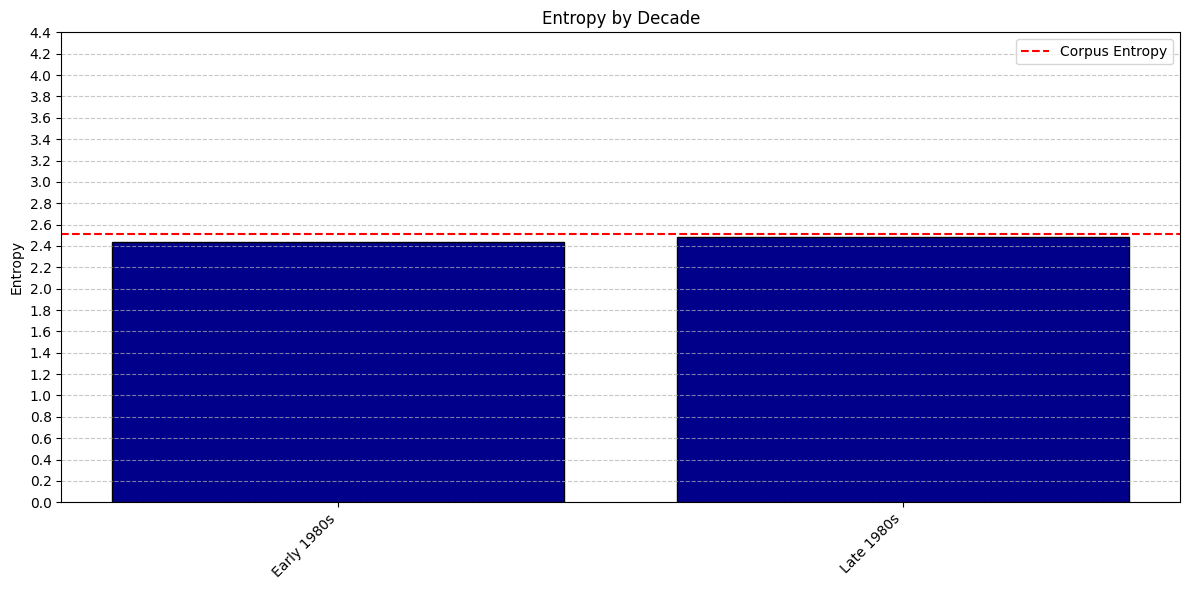


--- Saving results ---

Named decade analysis complete. Results and plots saved.


In [25]:
# Update the main function to include the named decade analysis
def main():
    # Load songs data
    DATA_PATH = r"../data/amr_diab_songs.csv"

    try:
        # Load csv file
        print("Loading songs data...")
        songs = pd.read_csv(DATA_PATH)

        # Extract lyrics for whole corpus entropy
        lyrics = pd.DataFrame({
            'Song': songs['Song'],
            'Year': songs['Year'],
            'Lyrics': songs['Lyrics'].dropna()
        })

        print(f"Total number of songs with lyrics: {len(lyrics)}")

        # 1. Compute corpus entropy first (needed for comparison in decade plot)
        print("\n--- Computing corpus entropy ---")
        lyrics_corpus = pd.DataFrame({
            'corpus': lyrics['Lyrics'].dropna()
        })

        # Calculate letter frequencies
        freqs = arabic_characters_frequency(lyrics_corpus)
        letter_normalized_freqs = normalize_arabic_letters(freqs)
        prob_dist = extract_prob_dist(letter_normalized_freqs)
        corpus_entropy = entropy(prob_dist)

        print(f"The entropy of the whole corpus is: {corpus_entropy}")

        # 2. Compute and plot named decade entropy
        print("\n--- Computing named decade entropy ---")
        named_decade_entropy, lyrics_with_decade = compute_entropy_by_named_decade(songs)

        print("Entropy values by named decade:")
        print(named_decade_entropy)

        print("\n--- Plotting named decade entropy ---")
        plot_named_decade_entropy(named_decade_entropy, corpus_entropy)

        # Save results
        print("\n--- Saving results ---")
        named_decade_entropy.to_csv(r"./results/named_decade_entropy.csv", index=False)
        lyrics_with_decade.to_csv(r"./results/lyrics_with_decade.csv", index=False)

        print("\nNamed decade analysis complete. Results and plots saved.")

    except Exception as e:
        print(f"An error occurred: {e}")
        # print traceback for more detailed error information
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

The updated `main()` function performs a detailed analysis of song lyrics:

`Corpus Entropy`: The entropy for the entire collection of songs is computed to measure the overall unpredictability.

`Named Decade Entropy`: The entropy for each song, grouped by named decades (e.g., "Late 1940s", "Early 1950s"), is calculated and visualized.


The function provides a comprehensive analysis of the diversity and unpredictability in song lyrics over different time periods (decades) and allows for comparison between individual song entropy and overall corpus entropy.